# Logistic Regression on Algerian Forest Fires Dataset

In [152]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Let's read our dataset

In [153]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", skiprows=[0,124,125,126])

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


## Cleaning the Data

In [155]:
#making sure there are no spaces in the column names
columns = [column.split()[0] for column in df.columns.tolist() ]
df.columns = columns

In [156]:
df[df["Classes"].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [157]:
df.shape

(244, 14)

In [158]:
# dropping the na value
df.dropna(inplace=True)
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [159]:
df.shape

(243, 14)

In [160]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [161]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

We see that the same category has many values due to uneccesary spaces, Lets remove them

In [162]:
#removing uneccessary spaces from the classes column data
df["Classes"] = df["Classes"].apply(lambda x: (" ").join(x.split()))

In [163]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

### Merging the day, month and Year column to a single datetime column

In [164]:
from datetime import datetime

In [165]:
df["day"] = df["day"].astype("str")
df["month"] = df["month"].astype("str")
df["year"] = df["year"].astype("str")

In [166]:
df["Date"] =  df["day"].values + "/" + df["month"] + "/" + df["year"]
df.drop(["day","month","year"], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1/6/2012
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2/6/2012
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,3/6/2012
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,4/6/2012
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,5/6/2012


In [167]:
df["Date"] = pd.to_datetime(df["Date"].to_numpy(), dayfirst=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    object        
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    object        
 10  Classes      243 non-null    object        
 11  Date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 24.7+ KB


In [169]:
#correcting the data types for DC and FWI Classes
df["DC"] = df["DC"].astype("float")
df["FWI"] = df["FWI"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    object        
 11  Date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 24.7+ KB


## Univariate Analysis

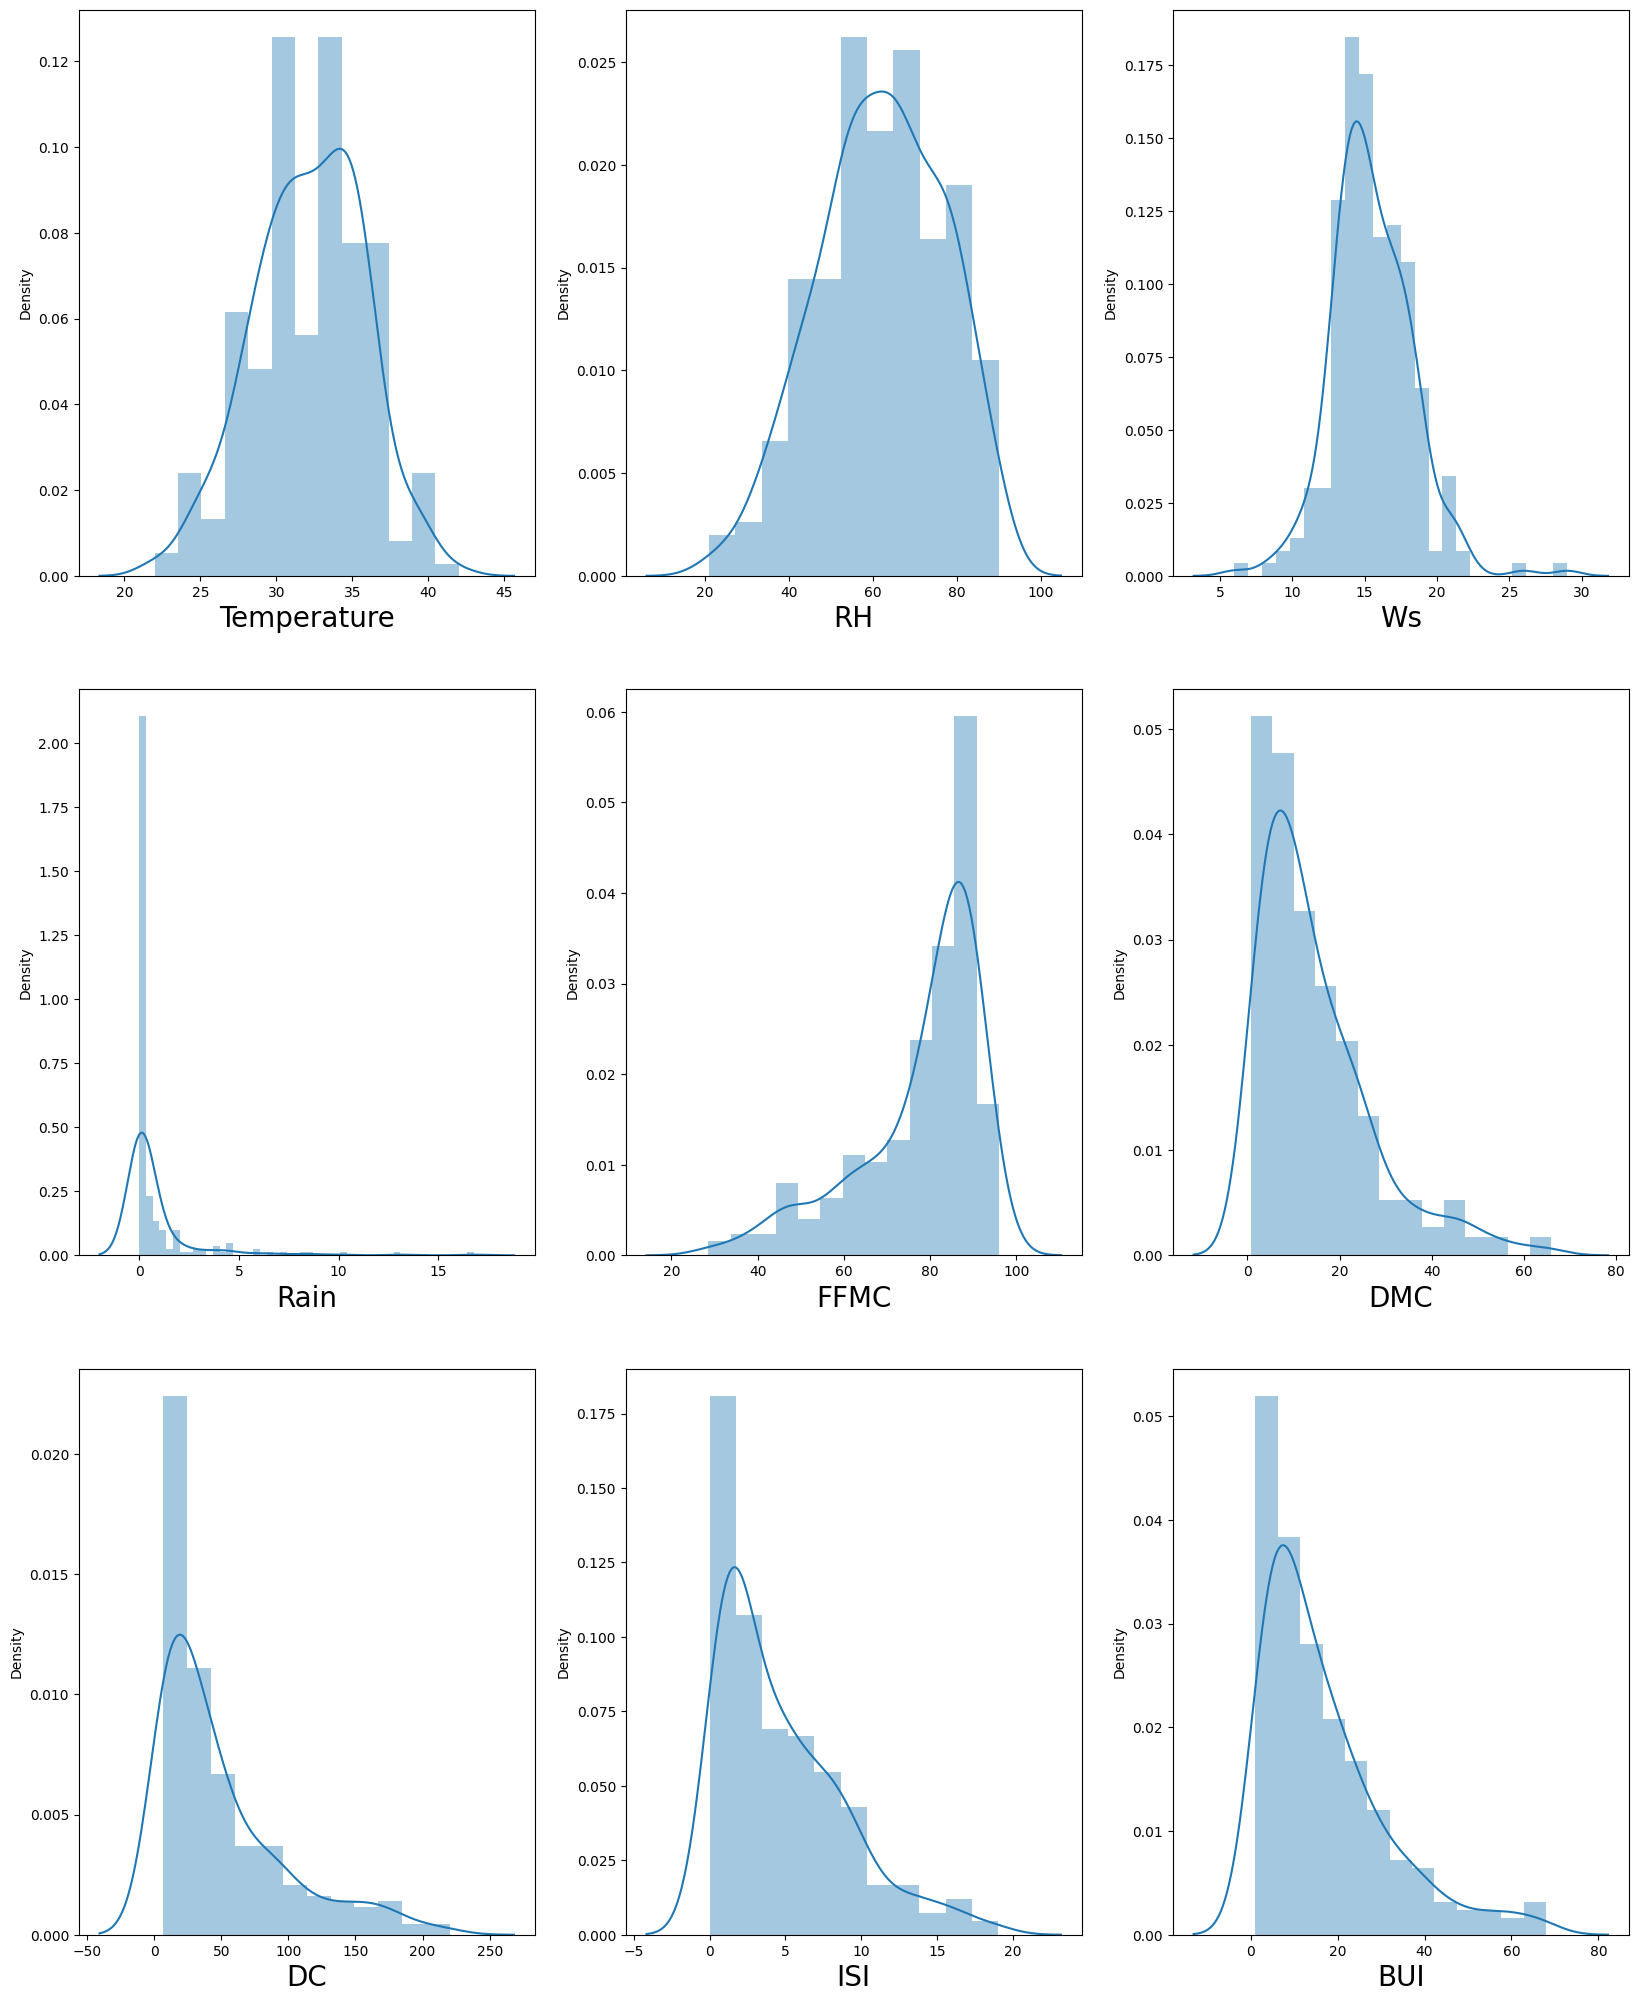

In [184]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 and column not in ["Classes","Date"] :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [185]:
#Lets get the descriptive statistic of each feauture

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


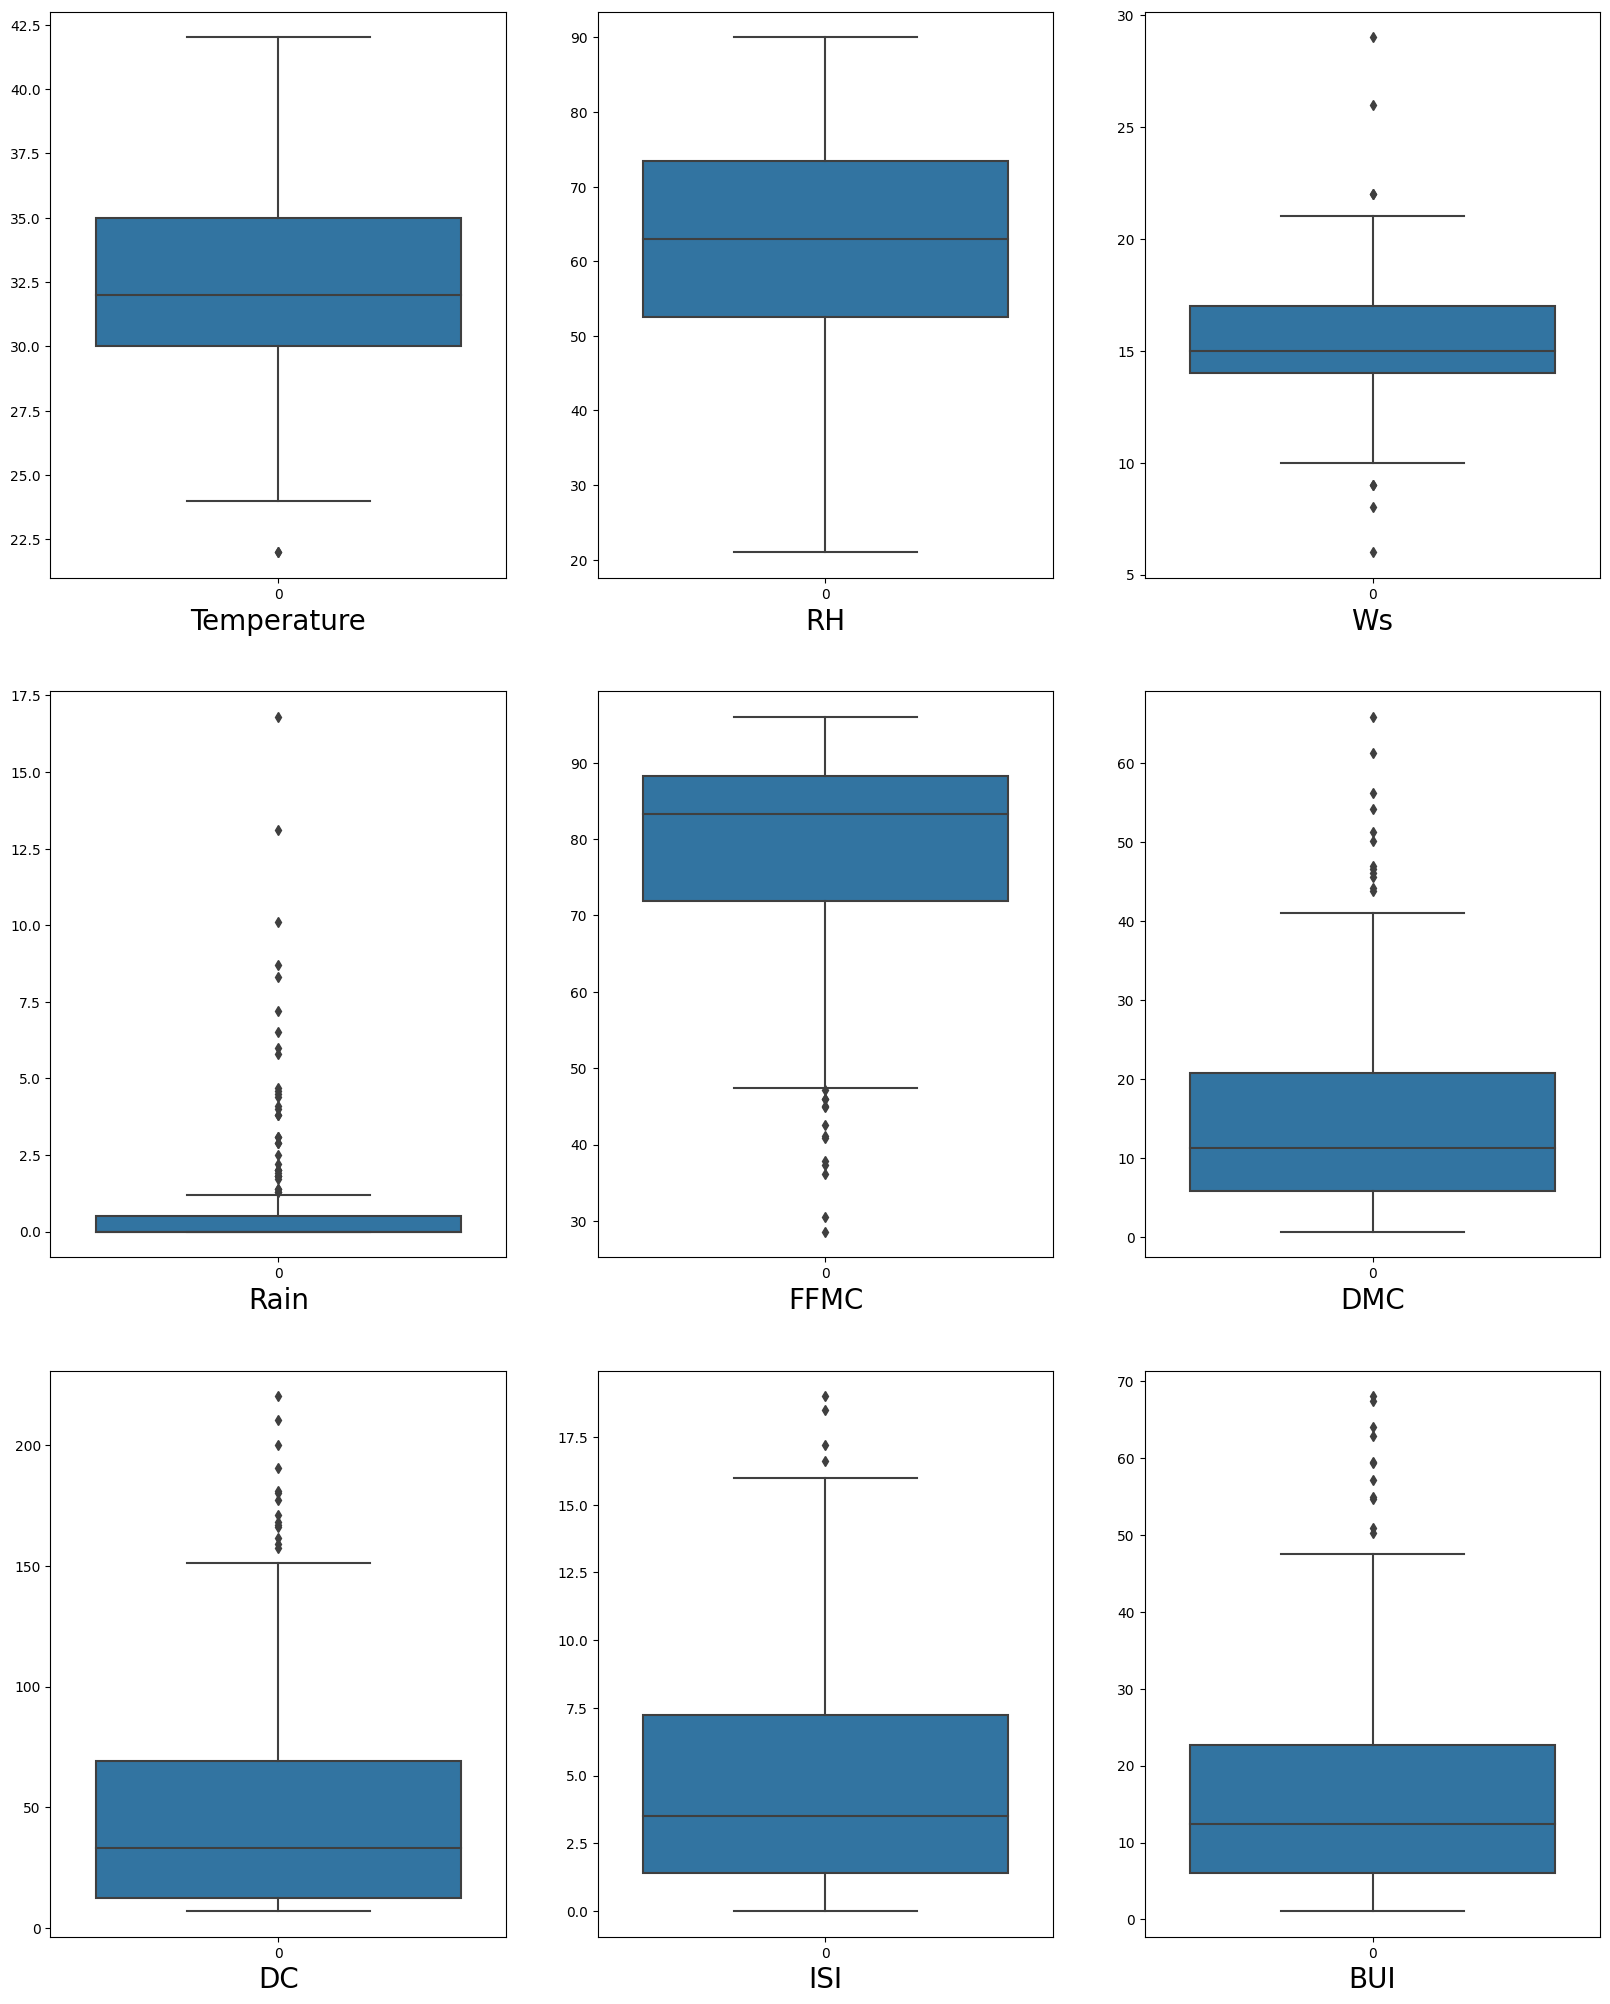

In [172]:
#We can see that some feature have outliers, let create a box plot to get a better understanding

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=9 and column not in ["Classes","Date"] :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [186]:
#Lets remove the outliers

df1 = df.copy()

q = df1["Rain"].quantile(0.95) #Getting the top 80%  rain data
df1 = df1[df1["Rain"] < q]
q = df1["FFMC"].quantile(0.05) #Getting the top 90% FFMC
df1 = df1[df1["FFMC"] > q]
q = df1["DMC"].quantile(0.98) #Getting the top 95% DMC
df1 = df1[df1["DMC"] < q]
q = df1["DC"].quantile(0.98) #Getting the top 95% DC
df1 = df1[df1["DC"] < q]
q = df1["BUI"].quantile(0.98) #Getting the top 95% BUI
df1 = df1[df1["BUI"] < q]

In [187]:
df.shape

(243, 12)

In [188]:
df1.shape

(203, 12)

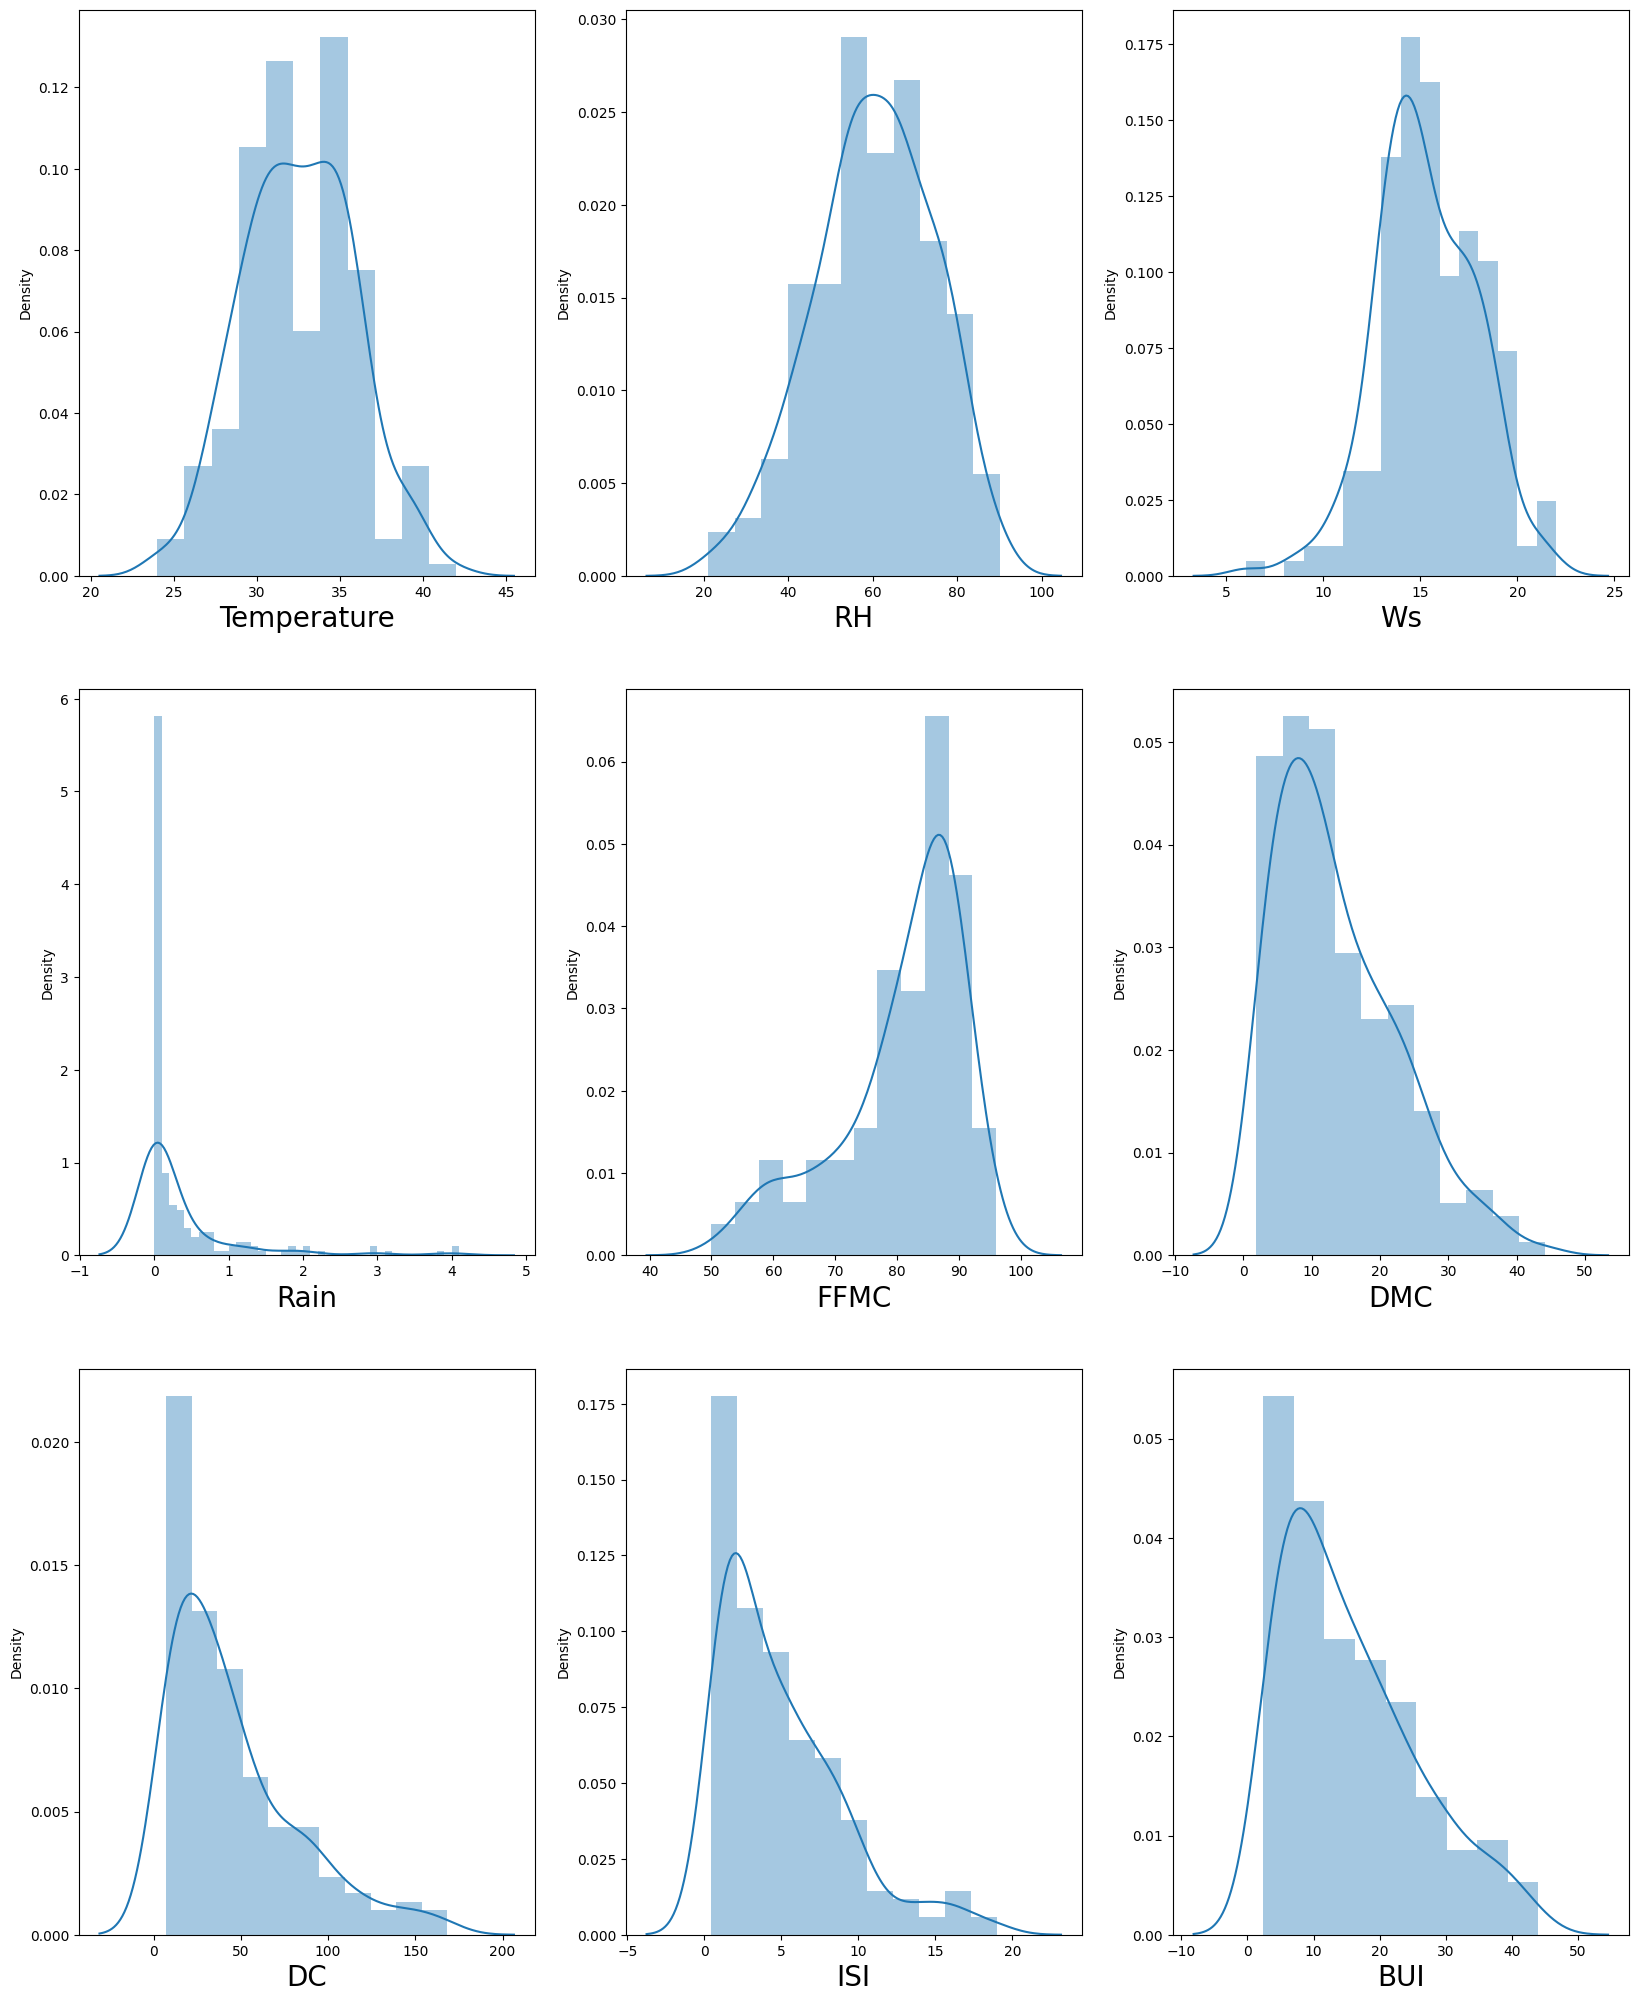

In [190]:
#Lets plot the boxplot and probability descity now

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1.columns:
    if plotnumber<=9 and column not in ["Classes","Date"] :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

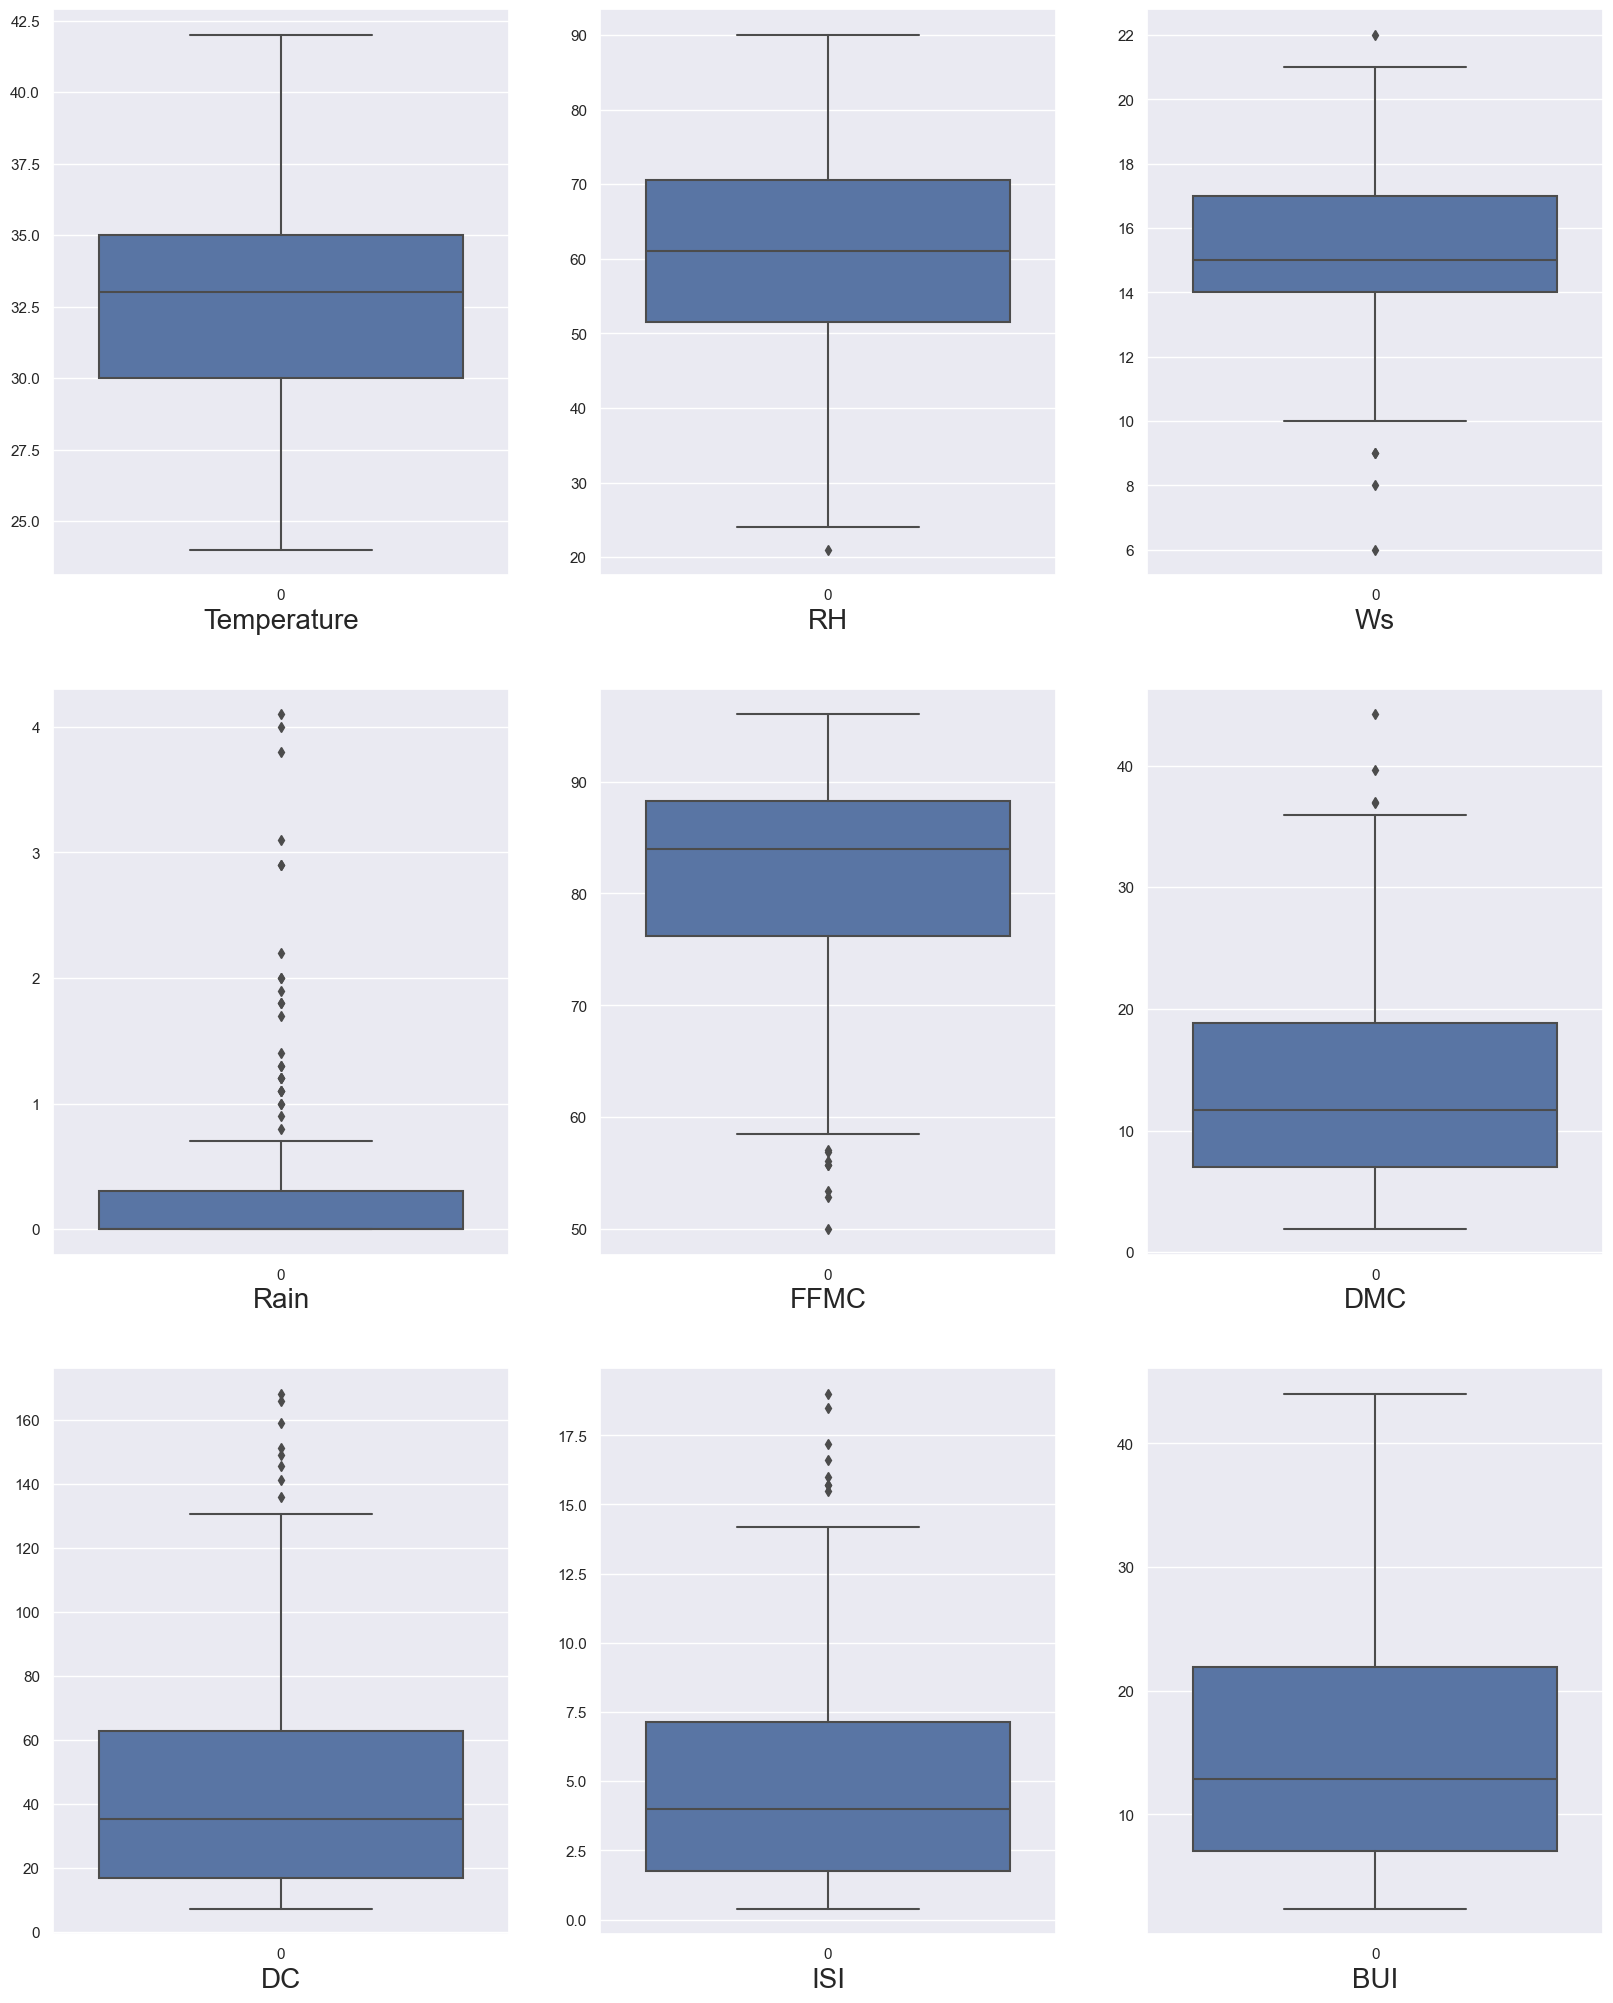

In [207]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1.columns:
    if plotnumber<=9 and column not in ["Classes","Date"] :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Our data looks a little better now

## Lets understand the features of the dataset

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire/not fire



Lets seggregate the dependent and independent featues

In [208]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,2012-06-06
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,2012-06-07


In [209]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Date'],
      dtype='object')

In [210]:
X_data = df1.drop(["Classes"], axis=1)
Y_data = df1["Classes"]

In [211]:
X_data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,2012-06-02
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,2012-06-05
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,2012-06-06
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,2012-06-07


### Visualising the Data

Lets get the bar plot of Fire/Not Fire

In [212]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot: xlabel='Classes', ylabel='count'>

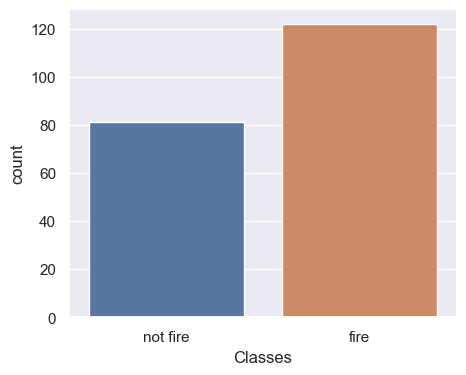

In [213]:
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(x = Y_data)

In [214]:
print("Totoal instances of fire occoured: ", Y_data.value_counts()["fire"])
print("Totoal instances of no-fire occoured: ", Y_data.value_counts()["not fire"])

Totoal instances of fire occoured:  122
Totoal instances of no-fire occoured:  81


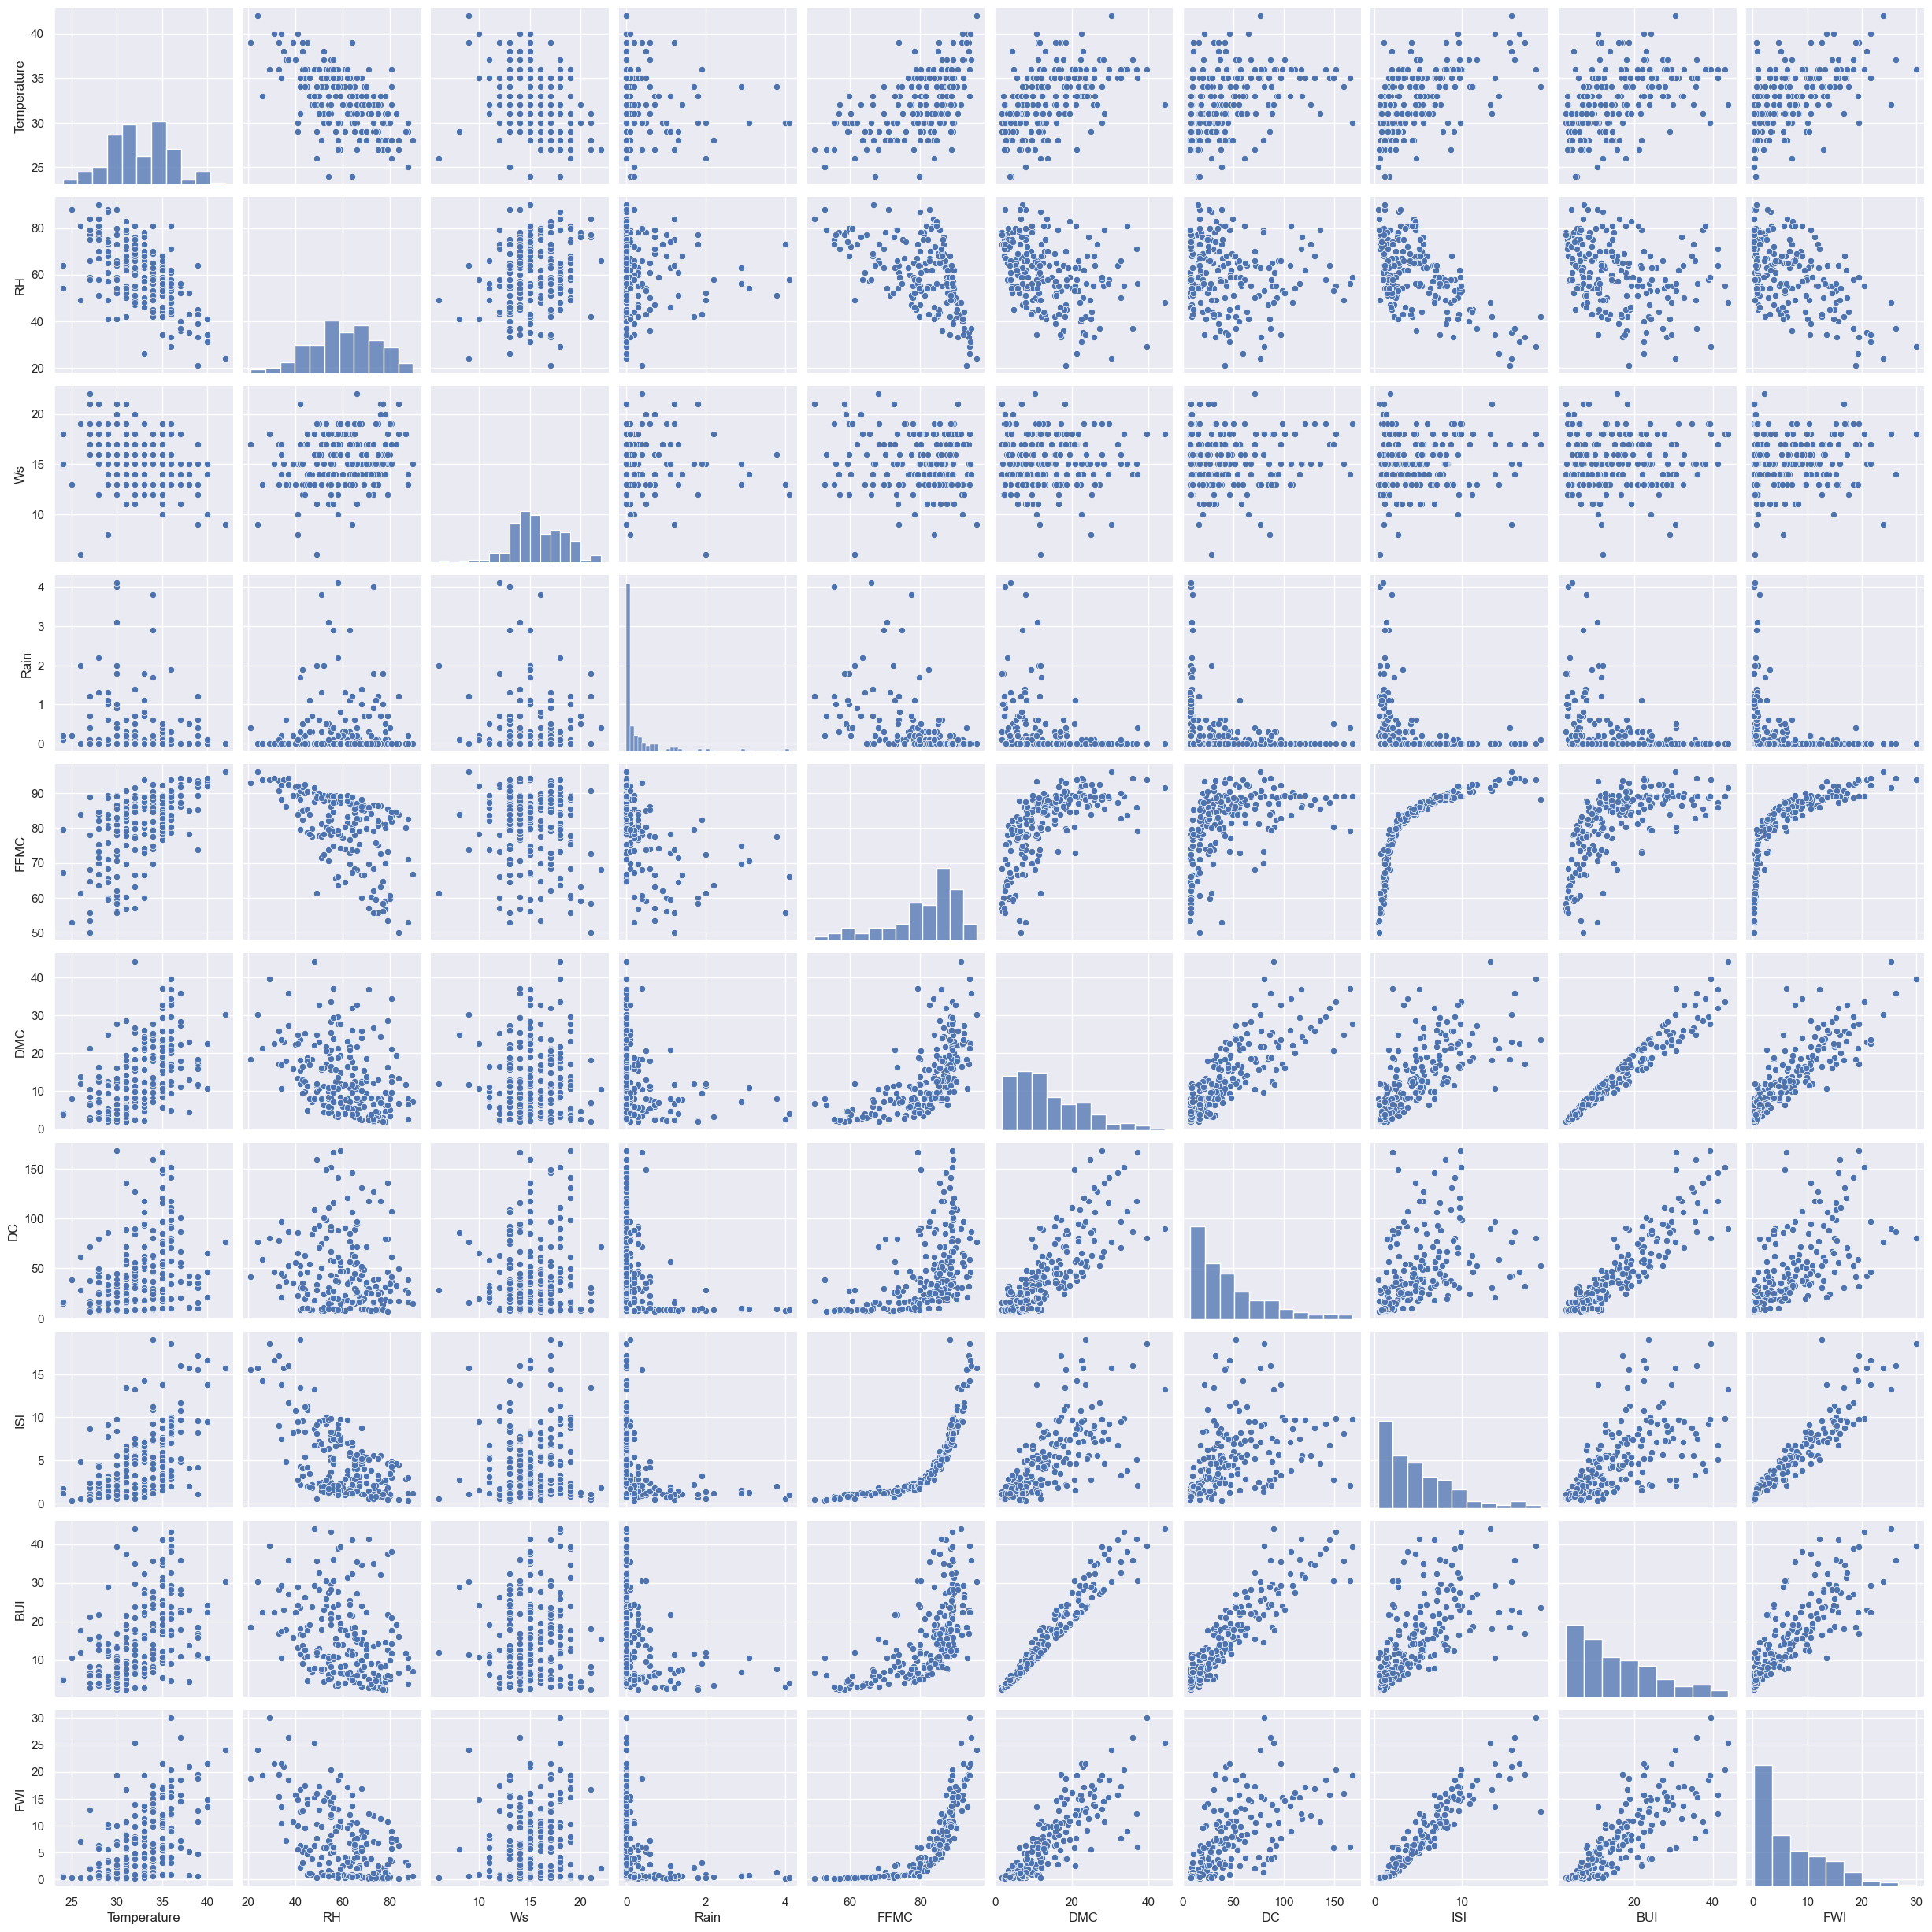

In [216]:
#getting reln b/w diff features using pairplot
sns.pairplot(X_data)

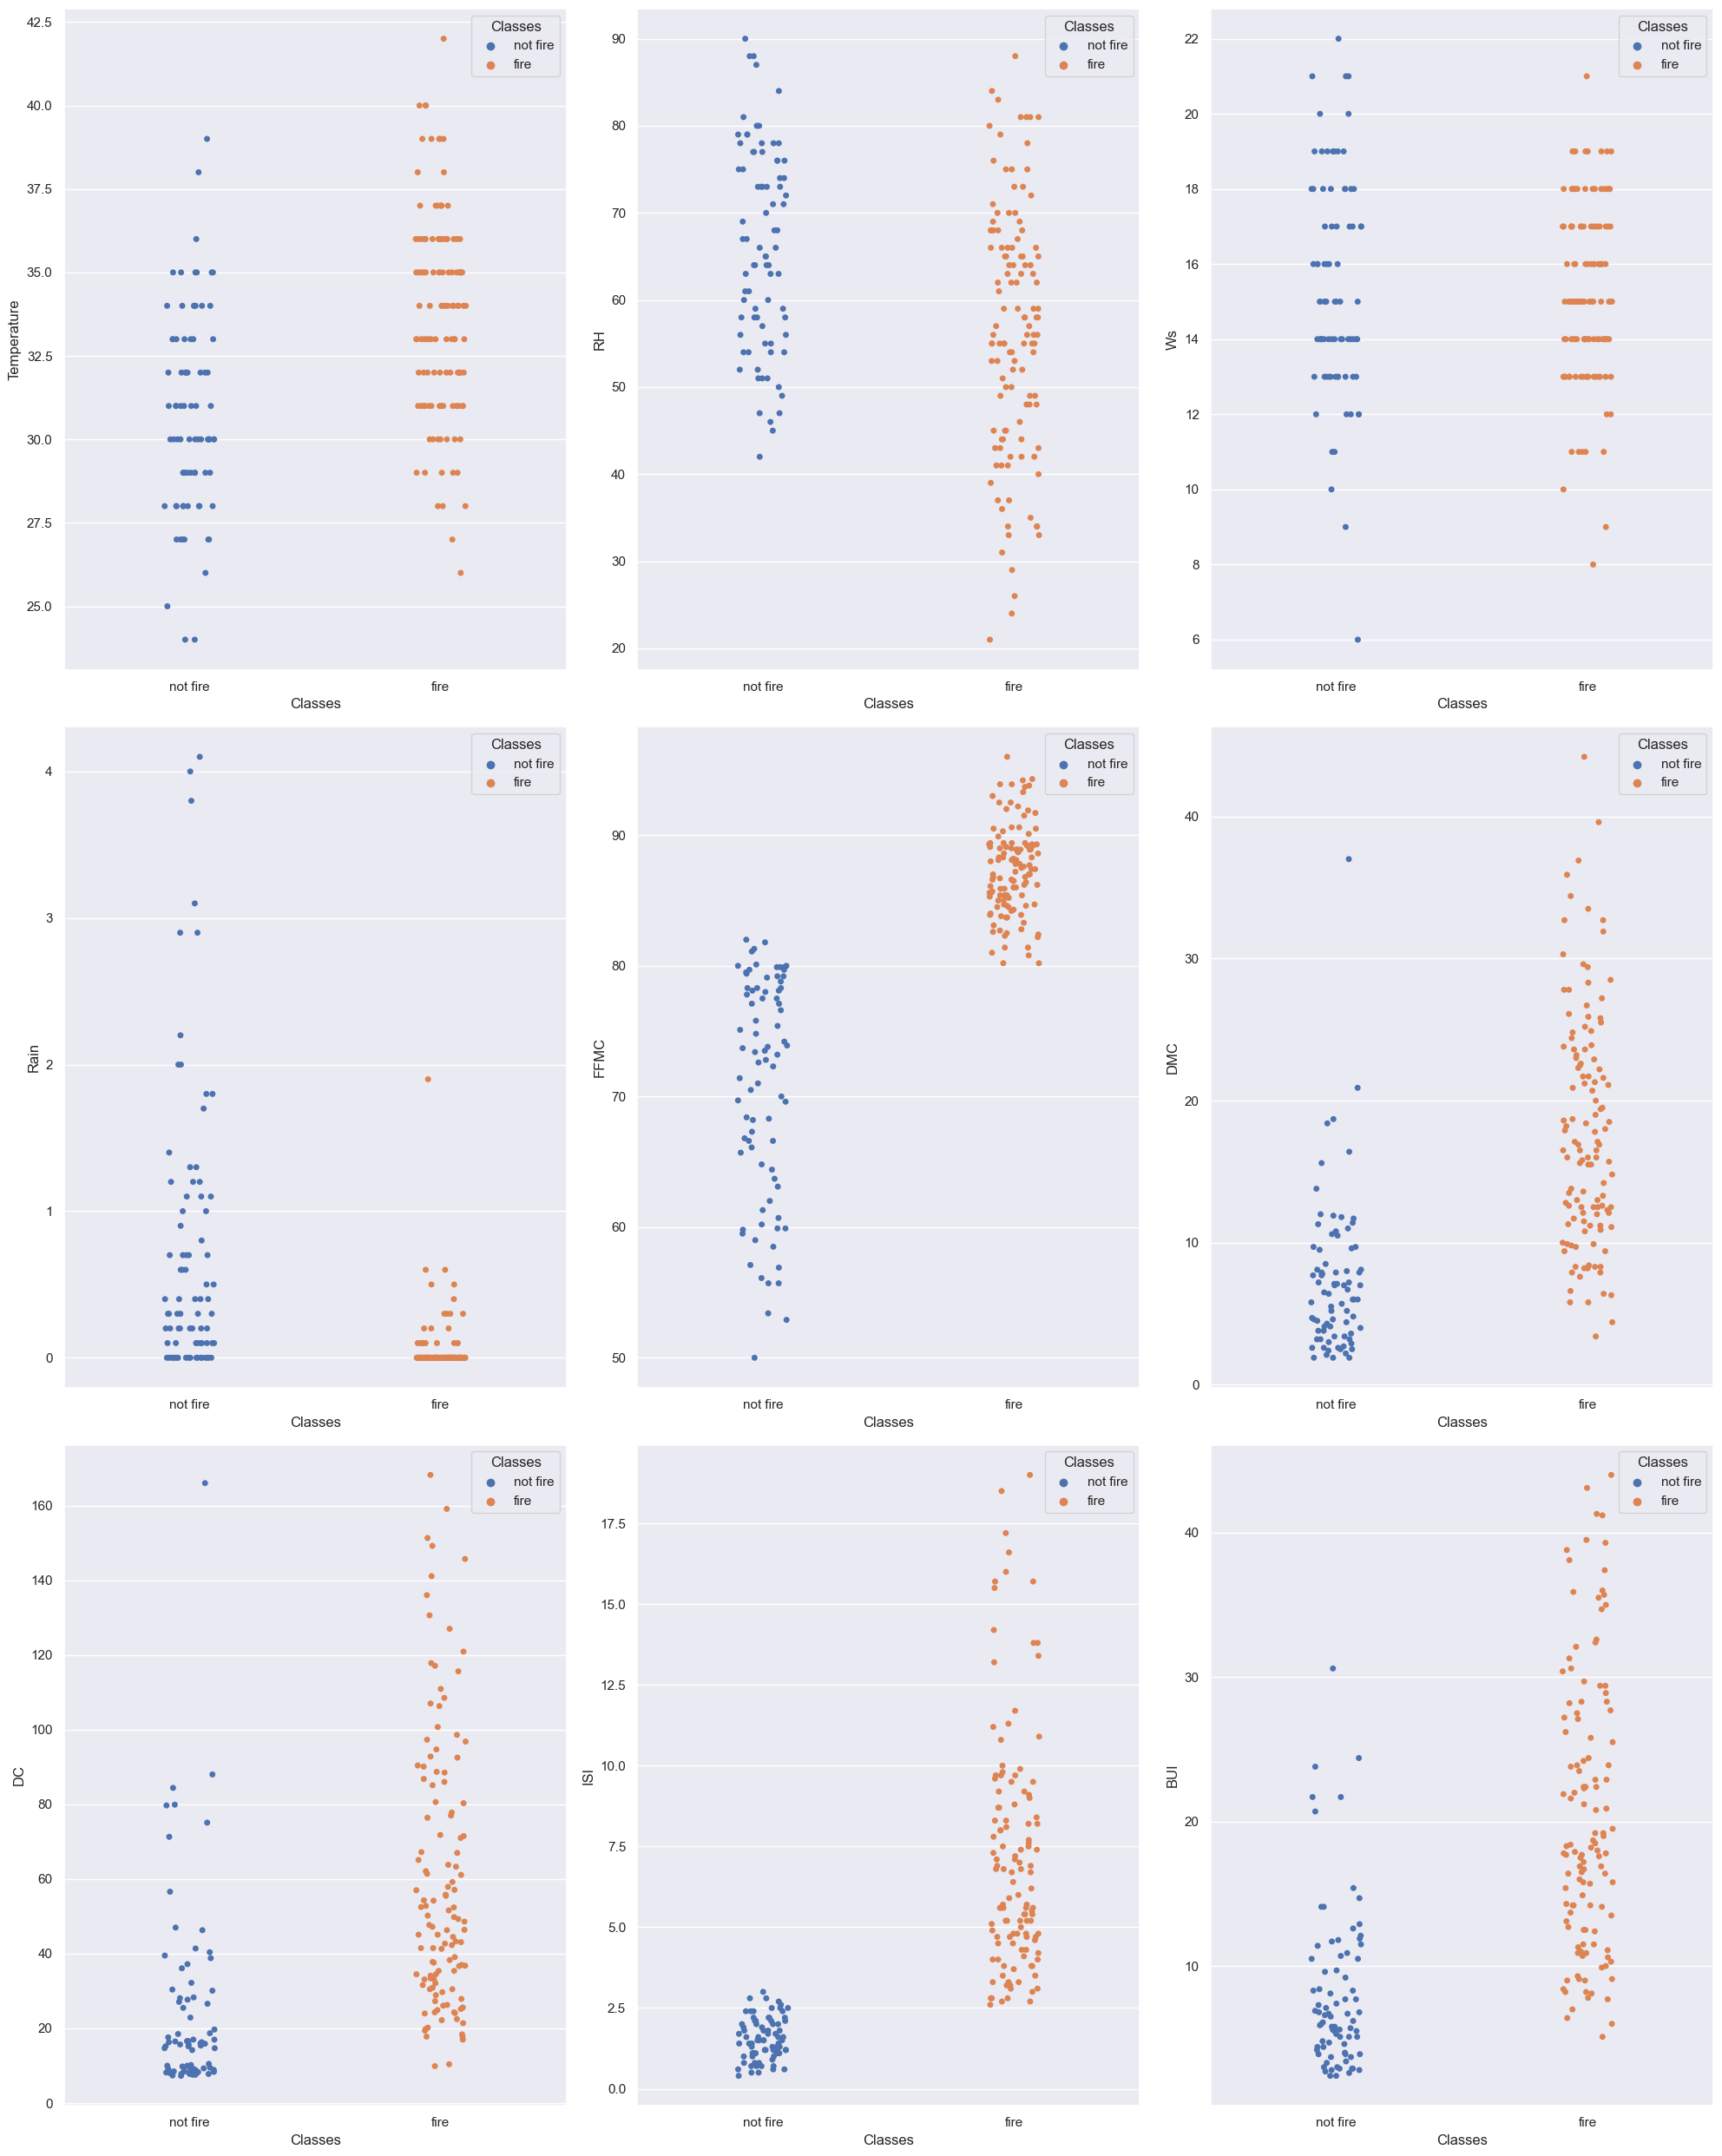

In [226]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1.columns:
    if plotnumber<=9 and column!=["Date","Classes"]:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(data=df1, x="Classes", y=column, hue="Classes")
    plotnumber+=1
plt.tight_layout()

When we observe the above plots, we see some patterns b/w different features<br>
Lets plot a heatmap to get a better understanding

<AxesSubplot: >

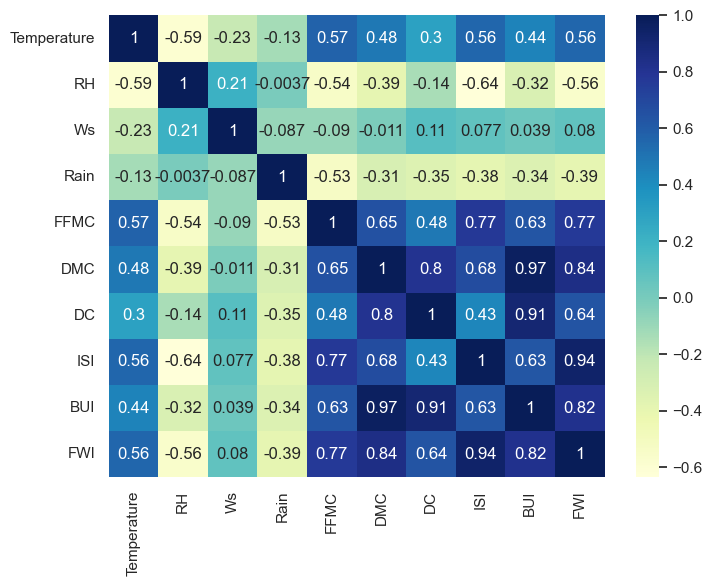

In [217]:
data1 = X_data.drop("Date", axis=1)
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data=data1.corr(), cmap="YlGnBu", annot=True)

We can see from the above heatmap there is high correlation b/w certain features, we can drop any one of those faetures, as both of them will have the same impact

In [250]:
#lets get the feature pairs that have corellation>0.85 (85% correlation)

data2 = data1.corr()>0.85
feature_pairs = []

for column in data2.columns:
    t1 = data2.index[data2[column]].tolist()
    for t in t1:
        if t!=column and (set([t,column]) not in feature_pairs):
            feature_pairs.append(set([t,column]))
    

In [251]:
feature_pairs

[{'BUI', 'DMC'}, {'BUI', 'DC'}, {'FWI', 'ISI'}]

Lets study the features before dropping them. <br>


<b>DC:</b> The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. <br>
<b>DMC:</b> The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth.<br>
<b>BUI:</b> The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion.<br>
<b>FWI:</b> The Fire Weather Index (FWI) is a meteorologically based index used worldwide to estimate fire danger.<br>
<b>ISI:</b> The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread.

In [252]:
#From BUI and DMC features, lets drop the BUI feature

data2 = data1.drop("BUI", axis=1)
feature_pairs = [pair for pair in feature_pairs if "BUI" not in pair]

#From ISI and FWI features, lets drop the FWI feature

data2 = data1.drop("FWI", axis=1)
feature_pairs = [pair for pair in feature_pairs if "FWI" not in pair]

## Building our Model

In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [257]:
scaler = StandardScaler()

In [261]:
X_data = data2
Y_data = Y_data

In [270]:
#splitiing the dataset into training and testing

x_train,x_test,y_train,y_test = train_test_split(X_data, Y_data, test_size= 0.25, random_state = 51)

In [271]:
#Standardiding the dataset
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [274]:
#Creating out model
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [275]:
y_pred = log_reg.predict(x_test)

In [278]:
#Lets get the accuracy of our Model 

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9215686274509803

In [279]:
#Lets get the confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[28,  0],
       [ 4, 19]], dtype=int64)

In [281]:
#Lets get the True Positive, False Positive, False Negetive and True Negetive from our Dataset

true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [282]:
#Getting Accuracy using the formula

# Accuracy = (TP+TN)/(TP+TN+FP+FN)

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9215686274509803

In [283]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [284]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.875

In [285]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9333333333333333

## We have successfully created our logictic regresion model with the following metrics


#### Accuracy = 92.15 %
#### Precision = 100%
#### Recall = 87.5 %
#### F-1 score = 93.33 %